## Plotting orbits for 2 bodies using Lagrange's equation

Defines a GravitationalOrbit class that is used to generate basic orbit plots from solving Lagrange's equations. I have written this notebook by making changes to the pre-existing/given notebooks from Carmen (both for the code and the markdown cells). I have also used google on to learn how to code a few things such at denoting double derivative in markdown, arguments of  plt.subplot, etc. I have also used/referred code from the hints video for this final HW.

* Last revised 17-Mar-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

## Euler-Lagrange equation

For a simple pendulum, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 m_1 (\dot x_1^2 + \dot y_1^2) + \frac12 m_2 (\dot x_2^2 + \dot y_2^2) + \frac{G m_1 m_2}{[(x_1^2 + y_1^2 )^2+(x_2^2 + y_2^2)^2]^\frac12}
\end{align}$

The Euler-Lagrange equation is
1. for x1

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
  \ddot x_1 = \frac {-G m_2 (x_1 - x_2)}{[(x_1^2 + y_1^2 )^2+(x_2^2 + y_2^2)^2]^\frac32}
  \ 
  \;.
\end{align}$

2. for y1

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
  \ddot y_1 = \frac {-G m_2 (y_1 - y_2)}{[(x_1^2 + y_1^2 )^2+(x_2^2 + y_2^2)^2]^\frac32}
  \ 
  \;.
\end{align}$

3. for x2

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
  \ddot x_2 = \frac {G m_1 (x_1 - x_2)}{[(x_1^2 + y_1^2 )^2+(x_2^2 + y_2^2)^2]^\frac32}
  \ 
  \;.
\end{align}$

3. for x2

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_2} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
  \ddot y_2 = \frac {G m_1 (y_1 - y_2)}{[(x_1^2 + y_1^2 )^2+(x_2^2 + y_2^2)^2]^\frac32}
  \ 
  \;.
\end{align}$


where r = $[(x_1^2 + y_1^2 )^2+(x_2^2 + y_2^2)^2]^\frac12$ is the distance between the two masses



In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class GravitationalOrbit():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L : float
        length of the simple pendulum
    g : float
        gravitational acceleration at the earth's surface
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=1., G=1.
                ):
        self.m1 = m1
        self.m2 = m2
        #self.omega_0 = np.sqrt(g/L)
        self.G = G
    
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            A 8-component vector with z[0] = x1(t) and z[1] = y1(t)
                                      z[2] = x2(t) and z[3] = y2(t)
                                      z[4] = dx1/dt = x1_dot and z[5] = dy1/dt = y1_dot
                                      z[6] = dx2/dt = x2_dot and z[7] = dy2/dt = y2_dot
        Returns
        -------
        
        """
        # defining each component in the z vector
        x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot = z 
        
        r= np.sqrt(((z[0]-z[2])**2) + ((z[1]-z[3])**2) )
        
        return [ z[4], z[5], z[6], z[7],
                -self.G * self.m2 * (z[0]-z[2])/(r**3),\
                -self.G * self.m2 * (z[1]-z[3])/(r**3),\
                 self.G * self.m1 * (z[0]-z[2])/(r**3),\
                 self.G * self.m1 * (z[1]-z[3])/(r**3) ]
    
    def solve_ode(self, t_pts, z_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        #z_0 = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0] 
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot = solution.y

        return x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make plots of the gravitational orbits of the two masses

In [7]:
# Labels for individual plot axes
orbit_labels = (r'$x$', r'$y$')
#phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
#state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 1.
m2 = 5.
G = 1.


# Instantiate a pendulum 
o1 = GravitationalOrbit(m1=m1, m2=m2, G=G)


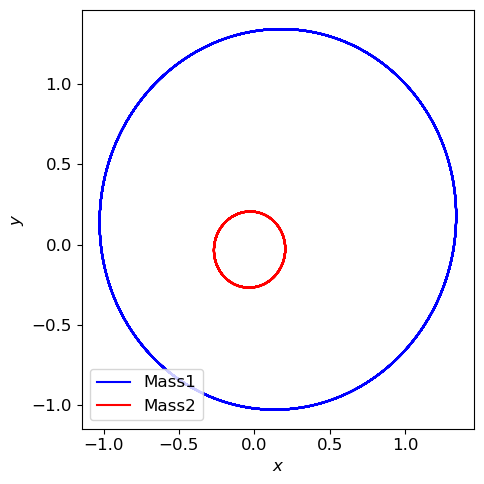

In [8]:
# both plots: same initial conditions
x1_0, y1_0 = 1 , 1
x2_0, y2_0 = -(m1/m2)* x1_0, -(m1/m2)* y1_0
x1_dot_0, y1_dot_0 = -1 , 1
x2_dot_0, y2_dot_0 = -(m1/m2)* x1_dot_0, -(m1/m2)* y1_dot_0

z_0 = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0] 

x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot= o1.solve_ode(t_pts,z_0)


# start the plot!
fig = plt.figure(figsize=(5,5))
# overall_title = 'Simple pendulum from Lagrangian:  ' + \
#                 rf' $\omega_0 = {p1.omega_0:.2f},$' + \
#                 rf'  $\phi_0 = {phi_0:.2f},$' + \
#                 rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
#                 '\n'     # \n means a new line (adds some space here)
#fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=orbit_labels, 
            color='blue',
            label= 'Mass1', 
            #title=r'$\(t)$', 
            ax=ax_a)    

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            axis_labels= orbit_labels, 
            color='red',
            label= 'Mass2', 
            #title=r'$\dot\phi(t)$', 
            ax=ax_a)    

                              

fig.tight_layout()
fig.savefig('Gravitational_orbit_final.png', bbox_inches='tight')  

As we can see above, the heavier mass $m_2$ is orbiting closer to the centre of mass (0,0) and the lighter mass $m_1$ is orbiting away from the centre of mass.

In [9]:
# Labels for individual plot axes
orbit_labels = (r'$x$', r'$y$')
#phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
#state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 50.
m2 = 1.
G = 100.


# Instantiate a pendulum 
o1 = GravitationalOrbit(m1=m1, m2=m2, G=G)


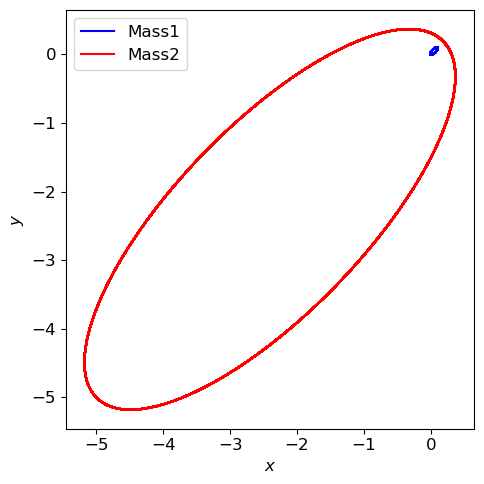

In [10]:
# both plots: same initial conditions
x1_0, y1_0 = 0.1 , 0.1
x2_0, y2_0 = -(m1/m2)* x1_0, -(m1/m2)* y1_0
x1_dot_0, y1_dot_0 = -0.1 , 0.1
x2_dot_0, y2_dot_0 = -(m1/m2)* x1_dot_0, -(m1/m2)* y1_dot_0

z_0 = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0] 

x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot= o1.solve_ode(t_pts,z_0)


# start the plot!
fig = plt.figure(figsize=(5,5))
# overall_title = 'Simple pendulum from Lagrangian:  ' + \
#                 rf' $\omega_0 = {p1.omega_0:.2f},$' + \
#                 rf'  $\phi_0 = {phi_0:.2f},$' + \
#                 rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
#                 '\n'     # \n means a new line (adds some space here)
#fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=orbit_labels, 
            color='blue',
            label= 'Mass1', 
            #title=r'$\(t)$', 
            ax=ax_a)    

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            axis_labels= orbit_labels, 
            color='red',
            label= 'Mass2', 
            #title=r'$\dot\phi(t)$', 
            ax=ax_a)    

                              

fig.tight_layout()
fig.savefig('Gravitational_orbit_final_heavy.png', bbox_inches='tight')  

As we can see above, the heavier mass $m_1$ (which is 50 times heavier than $m_2$) is orbiting so close to the centre of mass(0,0) that it's orbit is almost a point, making $m_1$ almost stationary whereas $m_2$ (which is 50 times lighter) has moved much further away such that its distance on average from the centre of mass is quite high compared to $m_1$ .

The assignment is based on code taken from the final hw hints video, theory, concepts, and formulae/ equations from the textbook, python notebooks from Carmen, ideas from classmates (Manali, Aiden), information obtained from google searches on python code, and discussion with class mates on discord. The following links were used- 

1. https://tex.stackexchange.com/questions/152951/how-to-write-two-dot-above-a-letter
2. https://www.google.com/search?q=how+to+write+x+double+dot+in+markdown&client=safari&rls=en&sxsrf=APwXEdfP4eYtPAV7qQE2m3LQVgFNYRSOeQ%3A1682560284113&ei=HNVJZOG7BobIptQP5uCJ0AY&ved=0ahUKEwjhubDA-cj-AhUGpIkEHWZwAmoQ4dUDCA8&uact=5&oq=how+to+write+x+double+dot+in+markdown&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzILCCEQoAEQwwQQiwM6CggAEEcQ1gQQsAM6BwgjELACECc6CgghEKABEMMEEAo6DQghEKABEMMEEAoQiwM6BwghEAoQiwNKBAhBGABQ5A9YyyJg5SVoA3AAeACAAXaIAasGkgEDMy41mAEAoAEByAEIuAEDwAEB&sclient=gws-wiz-serp
3. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
